In [10]:
import glob

import tensorflow as tf

from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util

from matplotlib import pyplot as plt
import yaml

import itertools

import numpy as np

import pandas as pd

In [60]:
metrics = ['accuracy_L1', 'accuracy_L12', 'loss', "I_XZ", "I_YZ"]

def event_file(path):
    files = glob.glob(f"{path}/*")
    return files[0]

def read_metrics(path):
    data = dict(zip(metrics,  [[] for x in range(len(metrics))]))
    
    for e in summary_iterator(event_file(path)):
        for v in e.summary.value:
            if v.tag in metrics:
                t = tensor_util.MakeNdarray(v.tensor)
                data[v.tag].append(float(t))
    return data


data = read_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25/logs/train");

In [61]:
def read_model_metrics(model_path):
    with open(f"{model_path}/summary.yml", "r") as fh:
        summary = yaml.safe_load(fh)


    del summary["metrics"]
    del summary["epoch"]
    

    train_res = read_metrics(f"{model_path}/logs/train")
    test_res = read_metrics(f"{model_path}/logs/test")
    
    df = pd.DataFrame(list(range(1, len(train_res["accuracy_L1"])+1)), columns=["epoch"])
    
    for metric in metrics:
        df[f"metrics:train:{metric}"] = train_res[metric]
        df[f"metrics:test:{metric}"] = test_res[metric]
        
    for k, v in summary.items():
        df[k] = v
        
    df['_key'] = "M=" + df.M.map(lambda m: "%02d" % m) + "::beta=" + df.beta.map(lambda b: "%0.0e" % b) \
        +  "::strategy="+df.strategy 
    
    df["metrics:train:error_L1"] =  1 - df["metrics:train:accuracy_L1"]
    df["metrics:test:error_L1"] =  1 - df["metrics:test:accuracy_L1"]
    df["metrics:train:error_L12"] =  1 - df["metrics:train:accuracy_L12"]
    df["metrics:test:error_L12"] =  1 - df["metrics:test:accuracy_L12"]
    return df

read_model_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25")

,epoch,metrics:train:accuracy_L1,metrics:test:accuracy_L1,metrics:train:accuracy_L12,metrics:test:accuracy_L12,metrics:train:loss,metrics:test:loss,metrics:train:I_XZ,metrics:test:I_XZ,metrics:train:I_YZ,...,beta,dataset,lr,model,strategy,_key,metrics:train:error_L1,metrics:test:error_L1,metrics:train:error_L12,metrics:test:error_L12
0,1,0.152650,0.1818,0.152150,0.1813,3.293843,3.243689,13.596339,13.594810,0.041680,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.847350,0.8182,0.847850,0.8187
1,2,0.190817,0.2061,0.190650,0.2068,3.200073,3.162155,13.596339,13.594810,0.135452,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.809183,0.7939,0.809350,0.7932
2,3,0.210683,0.2187,0.210683,0.2194,3.126605,3.097718,13.596343,13.594810,0.208921,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.789317,0.7813,0.789317,0.7806
3,4,0.221700,0.2218,0.221050,0.2235,3.068335,3.045867,13.596338,13.594806,0.267192,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.778300,0.7782,0.778950,0.7765
4,5,0.225983,0.2301,0.226867,0.2296,3.021138,3.004145,13.596332,13.594810,0.314387,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.774017,0.7699,0.773133,0.7704
5,6,0.230450,0.2303,0.230933,0.2316,2.982814,2.969330,13.596342,13.594806,0.352709,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.769550,0.7697,0.769067,0.7684
6,7,0.236283,0.2297,0.236533,0.2300,2.951271,2.941271,13.596336,13.594810,0.384253,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.763717,0.7703,0.763467,0.7700
7,8,0.234667,0.2385,0.234817,0.2384,2.925187,2.917221,13.596339,13.594809,0.410338,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.765333,0.7615,0.765183,0.7616
8,9,0.238850,0.2350,0.239800,0.2365,2.903591,2.897984,13.596343,13.594807,0.431933,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.761150,0.7650,0.760200,0.7635
9,10,0.239250,0.2385,0.240033,0.2377,2.885268,2.880395,13.596341,13.594809,0.450255,...,0.001,fashion_mnist,0.001,vdb/e1:1024|e2:1024|z:2,seq/d:1|e:20,M=01::beta=1e-03::strategy=seq/d:1|e:20,0.760750,0.7615,0.759967,0.7623


In [62]:
def get_models_from_dirs(dirs):
    files = []
    for d in dirs:
        files.extend(glob.glob(f"{d}/*/summary.yml"))
    
    files = list(map(lambda f: "/".join(f.split("/")[:-1]), files))
    print(f"Reading {','.join(dirs)}")
    print(f"we have {len(files)} models")
    return files

In [63]:
model_paths = get_models_from_dirs(["../artifacts-server/mnist--various-opts-M1"])

model_paths

Reading ../artifacts-server/mnist--various-opts-M1
we have 40 models


['../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-25--17-46-49',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--00-40-34',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-25--17-46-46',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--07-37-55',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--09-30-08-925070',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--12-10-41-823999',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-25--23-44-36',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-25--22-49-18',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--09-27-16-207667',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--12-10-36-984242',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-25--18-28-29',
 '../artifacts-server/mnist--various-opts-M1/vdb-mnist--2019-11-26--07-49-01',
 '../artifacts-server/mn

In [165]:
def read_stats_from(dirs):
    model_paths = get_models_from_dirs(dirs)
    
    df = pd.concat([read_model_metrics(m) for m in model_paths])
    return df


df_mnist_training_stats = read_stats_from(["../artifacts-server/mnist--various-opts-M*"])

Reading ../artifacts-server/mnist--various-opts-M*
we have 160 models


In [166]:
df_mnist_training_stats.groupby("_key")["M"].count()

_key
M=01::beta=1e-03::strategy=oneshot         1000
M=01::beta=1e-03::strategy=seq/d:10|e:1    1000
M=01::beta=1e-03::strategy=seq/d:20|e:1    1000
M=01::beta=1e-03::strategy=seq/d:5|e:1     1000
M=01::beta=1e-05::strategy=oneshot         1000
M=01::beta=1e-05::strategy=seq/d:10|e:1    1000
M=01::beta=1e-05::strategy=seq/d:20|e:1    1000
M=01::beta=1e-05::strategy=seq/d:5|e:1     1000
M=03::beta=1e-03::strategy=oneshot         1000
M=03::beta=1e-03::strategy=seq/d:10|e:1    1000
M=03::beta=1e-03::strategy=seq/d:20|e:1    1000
M=03::beta=1e-03::strategy=seq/d:5|e:1     1000
M=03::beta=1e-05::strategy=oneshot         1000
M=03::beta=1e-05::strategy=seq/d:10|e:1    1000
M=03::beta=1e-05::strategy=seq/d:20|e:1    1000
M=03::beta=1e-05::strategy=seq/d:5|e:1     1000
M=06::beta=1e-03::strategy=oneshot         1000
M=06::beta=1e-03::strategy=seq/d:10|e:1    1000
M=06::beta=1e-03::strategy=seq/d:20|e:1    1000
M=06::beta=1e-03::strategy=seq/d:5|e:1     1000
M=06::beta=1e-05::strategy=oneshot 

In [167]:
df_mnist_training_stats[:10]

,epoch,metrics:train:accuracy_L1,metrics:test:accuracy_L1,metrics:train:accuracy_L12,metrics:test:accuracy_L12,metrics:train:loss,metrics:test:loss,metrics:train:I_XZ,metrics:test:I_XZ,metrics:train:I_YZ,...,beta,dataset,lr,model,strategy,_key,metrics:train:error_L1,metrics:test:error_L1,metrics:train:error_L12,metrics:test:error_L12
0,1,0.917701,0.9567,0.917701,0.9570,0.479063,0.214096,1104.911743,818.873352,2.853913,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.082299,0.0433,0.082299,0.0430
1,2,0.967384,0.9692,0.967749,0.9696,0.180185,0.151273,747.563354,703.474976,3.149219,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.032616,0.0308,0.032251,0.0304
2,3,0.979882,0.9750,0.980482,0.9755,0.119072,0.126384,646.555603,611.021118,3.209324,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.020118,0.0250,0.019518,0.0245
3,4,0.985882,0.9770,0.986348,0.9773,0.087153,0.111173,596.839172,561.912170,3.240744,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.014118,0.0230,0.013652,0.0227
4,5,0.990232,0.9768,0.991348,0.9781,0.062155,0.109513,540.799561,513.446106,3.265181,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.009768,0.0232,0.008652,0.0219
5,6,0.994332,0.9793,0.994998,0.9807,0.045387,0.098269,506.301758,479.119812,3.281605,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.005668,0.0207,0.005002,0.0193
6,7,0.996382,0.9805,0.996916,0.9805,0.034189,0.099301,485.951965,478.994995,3.292599,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.003618,0.0195,0.003084,0.0195
7,8,0.997432,0.9794,0.997832,0.9795,0.026937,0.099056,467.959229,461.198151,3.299670,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.002568,0.0206,0.002168,0.0205
8,9,0.998733,0.9800,0.998866,0.9801,0.019882,0.103406,447.566132,447.654388,3.306520,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.001267,0.0200,0.001134,0.0199
9,10,0.999083,0.9806,0.999467,0.9815,0.016094,0.096250,440.314728,427.749268,3.310236,...,0.00001,mnist,0.0001,vdb/e1:1024|e2:1024|z:256,seq/d:20|e:1,M=03::beta=1e-05::strategy=seq/d:20|e:1,0.000917,0.0194,0.000533,0.0185


In [168]:
def label_alias(M, label):
    if label == "I_XZ":
        return "$I(X; Z)$"
    elif label == "I_YZ":
        if M == 1:
            return "$I(Y; Z)$"
        else:
            return "$J(Y; Z)$"
    else:
        return label

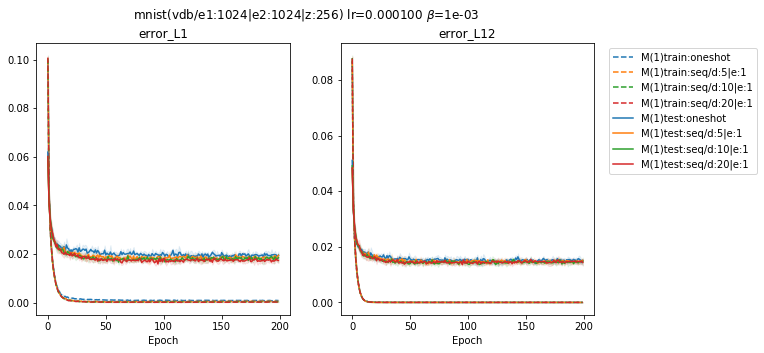

In [220]:
agg_funcs = ['mean','std']
cm = plt.get_cmap('tab10')

def plot_training(df, beta=-1, sets=["train", "test"], models=[], metrics=["error_L1", "error_L12"]):
    kmetrics = map(lambda x: "metrics:%s:%s" % x, itertools.product(sets, metrics))

    agg_dict = dict(list(map(lambda k: (k, agg_funcs), kmetrics)))
    
    data = dict()
    for mm in models:
        M, strategy =  mm.split("-")
        M = int(M[1:])
        maj_M = M
        df_select = df[(df.M == M) & (df.strategy == strategy) & (df.beta == beta)].groupby(["epoch"]) \
            .agg(agg_dict) \
            .reset_index()
        data[mm] = df_select
        
    plt.figure(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        for s in sets:
            for k, mm in enumerate(models):

                M, strategy =  mm.split("-")
                M = int(M[1:])

                color = cm.colors[k]
                df_select = data[mm]
                std = df_select[f"metrics:{s}:{metric}"]["std"]
                mean = df_select[f"metrics:{s}:{metric}"]["mean"]
                epoch = df_select.index.values
                plt.plot(
                    epoch,
                    mean,
                    ls = "--" if s == "train" else "-",
                    label=f"M({M}){s}:{strategy}",
                    color = color
                )

                plt.fill_between(epoch, mean-std, mean+std, color=color, alpha=0.1)
        plt.title(metric)
        plt.xlabel(r"Epoch")
        
        if i == 1:
            lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

    dataset = df.dataset.values[0]
    plt.suptitle(r"%s(%s) lr=%f $\beta$=%0.0e" % (df.dataset.values[0], df.model.values[0], df.lr.values[0], beta))

    plt.savefig("./figures/training-curve/%s-training-curve-beta%0.0e-M%d.pdf" % (dataset, beta, M), bbox_extra_artists=(lgd,), bbox_inches='tight')
    
plot_training(df_mnist_training_stats,
    beta=0.001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M1-seq/d:5|e:1",
        "M1-seq/d:10|e:1",
        "M1-seq/d:20|e:1"
    ]
)

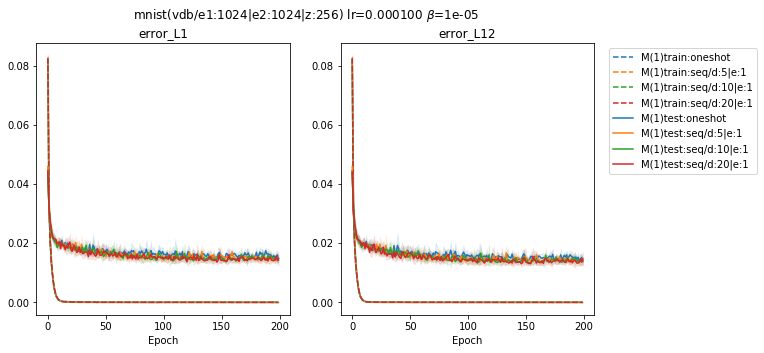

In [221]:
plot_training(df_mnist_training_stats,
    beta=0.00001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M1-seq/d:5|e:1",
        "M1-seq/d:10|e:1",
        "M1-seq/d:20|e:1"
    ]
)

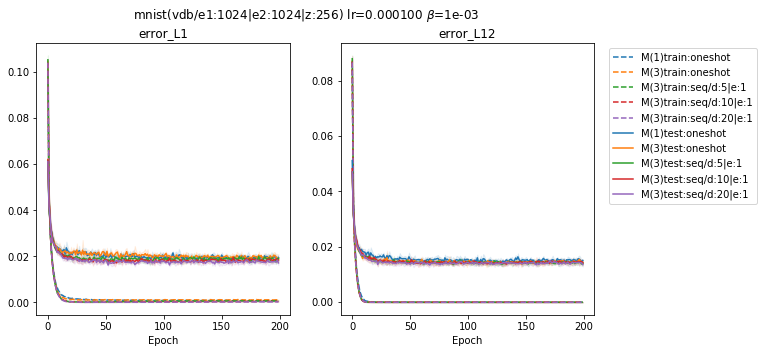

In [222]:
plot_training(df_mnist_training_stats,
    beta=0.001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M3-oneshot",
        "M3-seq/d:5|e:1",
        "M3-seq/d:10|e:1",
        "M3-seq/d:20|e:1"
    ]
)

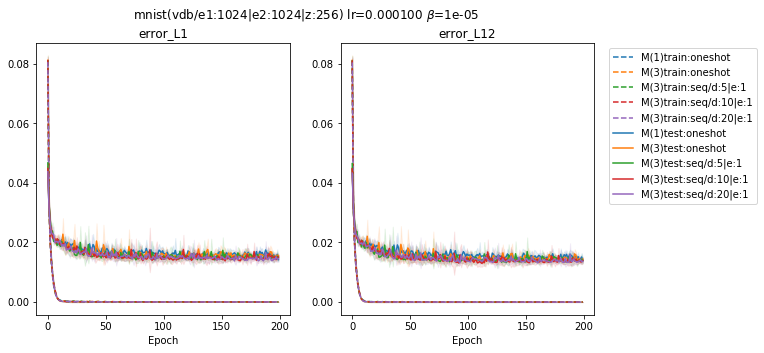

In [223]:
plot_training(df_mnist_training_stats,
    beta=0.00001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M3-oneshot",
        "M3-seq/d:5|e:1",
        "M3-seq/d:10|e:1",
        "M3-seq/d:20|e:1"
    ]
)

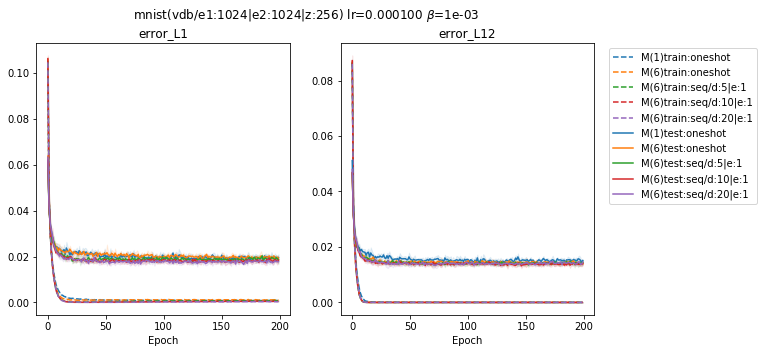

In [224]:
plot_training(df_mnist_training_stats,
    beta=0.001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M6-oneshot",
        "M6-seq/d:5|e:1",
        "M6-seq/d:10|e:1",
        "M6-seq/d:20|e:1"
    ]
)

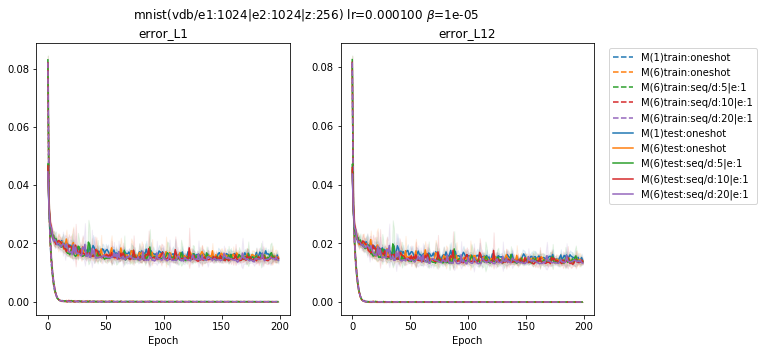

In [225]:
plot_training(df_mnist_training_stats,
    beta=0.00001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M6-oneshot",
        "M6-seq/d:5|e:1",
        "M6-seq/d:10|e:1",
        "M6-seq/d:20|e:1"
    ]
)

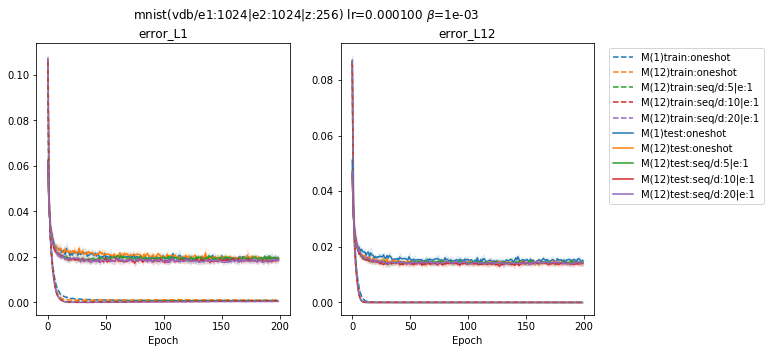

In [226]:
plot_training(df_mnist_training_stats,
    beta=0.001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M12-oneshot",
        "M12-seq/d:5|e:1",
        "M12-seq/d:10|e:1",
        "M12-seq/d:20|e:1"
    ]
)

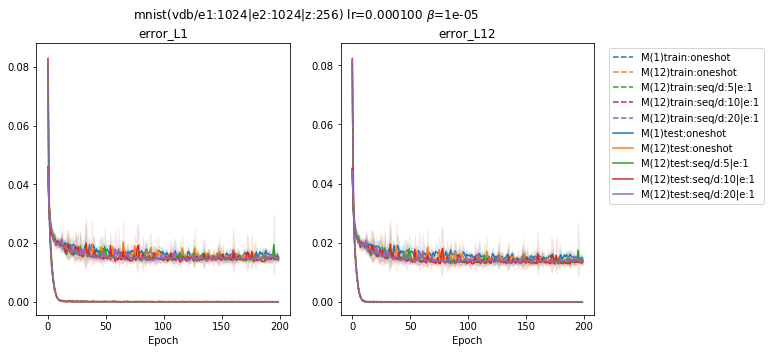

In [227]:
plot_training(df_mnist_training_stats,
    beta=0.00001,
    sets = [
        "train",
        "test"
    ],
    models=[
        "M1-oneshot",
        "M12-oneshot",
        "M12-seq/d:5|e:1",
        "M12-seq/d:10|e:1",
        "M12-seq/d:20|e:1"
    ]
)